**1. Mencari Nilai B0 dan B dengan Koding Sendiri Menggunakan Gradien Descent Ridge Loss (Mencari Nilai B0 dan B)**

In [ ]:
from sklearn.datasets import load_diabetes
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [ ]:
# Load the dataset
data = load_diabetes()
X = data.data
y = data.target

In [ ]:
# Define ridge loss function
def ridge_loss(B, B0, X, y, lamb):
    return np.sum((y - B0 - np.dot(X, B))**2) + lamb * np.sum(B**2)

In [ ]:
def dRidgeLoss_dB0(B0, B, X, y):
    # Compute the dot product of X and B
    X_dot_B = np.dot(X, B)
    # Compute the residual term (y - B0 - X.dot(B))
    residual = y - B0 - X_dot_B
    # Compute the derivative of the loss function with respect to B0
    dL_dB0 = -2 * np.sum(residual)
    return dL_dB0

In [ ]:
def dRidgeLoss_dB(B0, B, X, y, lamb):
    # Compute the residual term (y - B0 - X.dot(B))
    residual = y - B0 - np.dot(X, B)
    # Compute the derivative of the loss function with respect to B
    dL_dB = -2 * np.dot(X.T, residual) + 2 * lamb * B
    return dL_dB

In [ ]:
# Define custom gradient descent algorithm
def gradient_descent(X, y, eta, lamb, epochs):
    # Initialize coefficients
    B0 = 0
    B = np.zeros(X.shape[1])

    # Loss storage
    lossGD = []

    for i in range(epochs):
        # Compute gradients
        dB0 = dRidgeLoss_dB0(B0, B, X, y)
        dB = dRidgeLoss_dB(B0, B, X, y, lamb)

        # Update coefficients
        B0 -= eta * dB0
        B -= eta * dB

        # Compute loss
        loss = ridge_loss(B, B0, X, y, lamb)
        lossGD.append(loss)

    return B0, B, lossGD

In [ ]:
# Set hyperparameters
eta = 0.001
lamb =  0.00001
epochs = 100000

# Run gradient descents
B0, B, lossGD = gradient_descent(X, y, eta, lamb, epochs)

# Print coefficients
print("B0:", B0)
print("B:", B)

B0: 152.13348416289597
B: [  -9.37383314 -239.09991728  521.44733414  323.75539875 -654.00865828
  367.10577626   39.25325876  159.43403276  699.78607927   68.13691422]


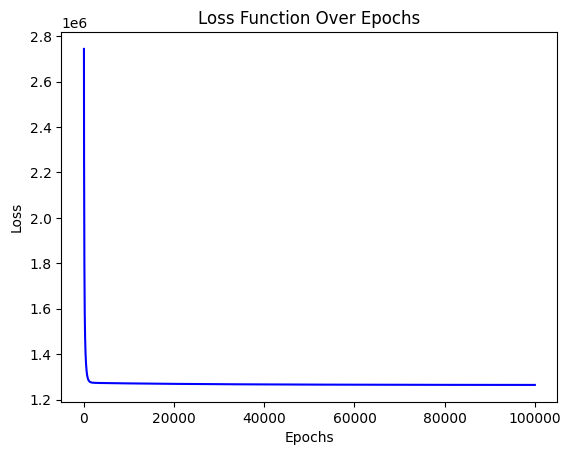

In [ ]:
# Plot the loss function result
plt.plot(range(epochs), lossGD, color='blue')
plt.title('Loss Function Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

**2. Mencari Nilai B0 dan B dengan menggunakan SKLearn Library (Linear Regression dan Ridge Loss Function)**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

# Load the dataset
data = load_diabetes()
X = data.data
y = data.target

linear_model = LinearRegression()
linear_model.fit(X,y)

# Corrected print statements
print(linear_model.coef_)  # Coefficients of the linear regression model
print(linear_model.intercept_)  # Intercept of the linear regression model

[ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]
152.13348416289597


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_diabetes

# Load the dataset
data = load_diabetes()
X = data.data
y = data.target

# Specify the alpha parameter for Ridge regression
alpha = 0.001

ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X, y)

# Corrected print statements
print(ridge_model.coef_)  # Coefficients of the Ridge regression model
print(ridge_model.intercept_)  # Intercept of the Ridge regression model


[  -9.54916175 -239.08695779  520.3693746   323.82274522 -712.32215918
  413.37912498   65.81132269  167.51300694  720.9399241    68.12336029]
152.133484162896


Hasil Nilai B0 dan B  Koding

B0: 152.13348416289597

B: [  -9.37383314  -239.09991728   521.44733414  
 323.75539875  -654.00865828
   367.10577626    39.25325876   159.43403276  
    699.78607927    68.13691422]

Hasil nilai B0 dan B dari koding relatif mendekati dengan hasil dari Linear Regression dan Ridge Loss dari library scikit learn)

**3. Menggambar hasil prediksi**

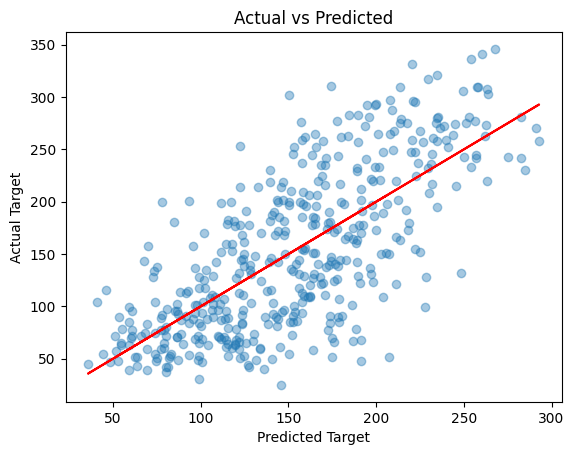

In [ ]:
# Function to make predictions
def predict(B0, B, X):
    return B0 + np.dot(X, B)

# Make predictions using the obtained coefficients
predictions = predict(B0, B, X)

# Plot real data and predictions using own coding
plt.scatter(predictions, y, alpha=0.4)
plt.plot(predictions, predictions, c='r')
plt.xlabel('Predicted Target')
plt.ylabel('Actual Target')
plt.title('Actual vs Predicted')
plt.show()


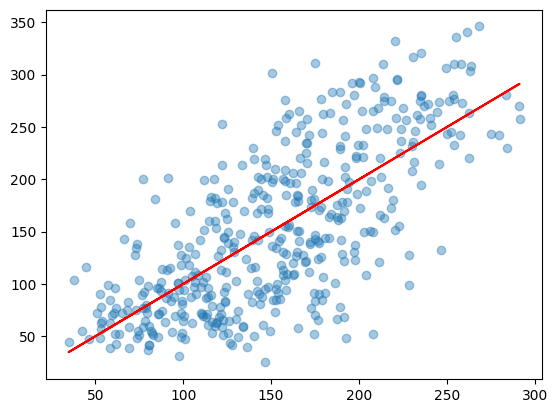

In [ ]:
# Plot real data and predictions using Linear Regression
pred = linear_model.predict(X)
plt.scatter(pred,y,alpha=0.4)
plt.plot(pred,pred,c='r')
plt.show()

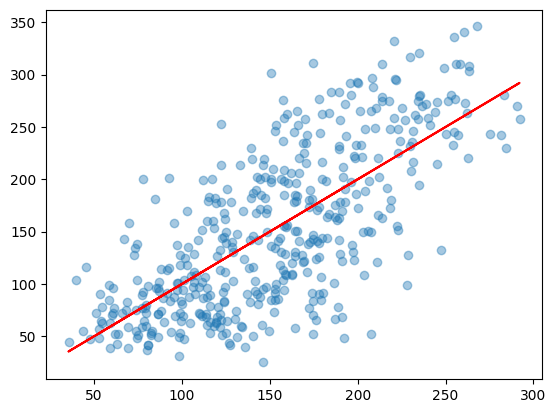

In [ ]:
# Plot real data and predictions using Ridge Regression
pred = ridge_model.predict(X)
plt.scatter(pred,y,alpha=0.4)
plt.plot(pred,pred,c='r')
plt.show()